<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [1]:
%load_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_pickle("datos/financial_data_target_ajustado.pkl")
df.head()

,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,location_City-10,location_City-11,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.513546,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

,train,test
accuracy,0.578625,0.561
precision,0.575239,0.556052
recall,0.578625,0.561
f1,0.57587,0.557449
kappa,0.1397,0.09508
auc,0.627693,0.615044
time_seconds,0.003228,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.003228


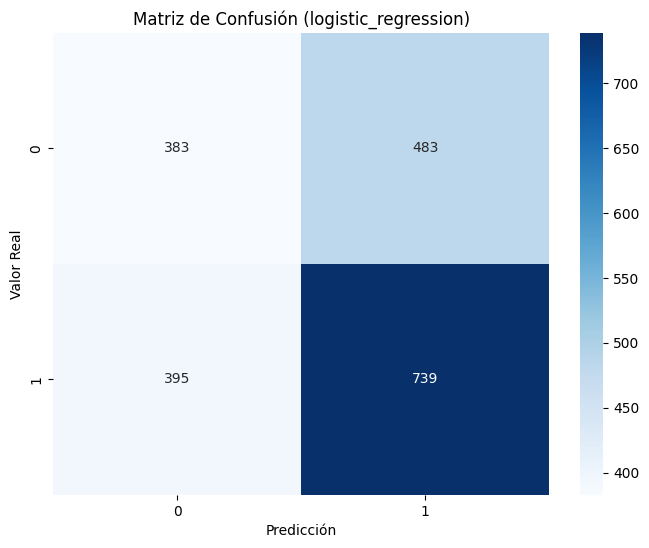

In [4]:
soporte.plot_matriz_confusion("logistic_regression")

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo3\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


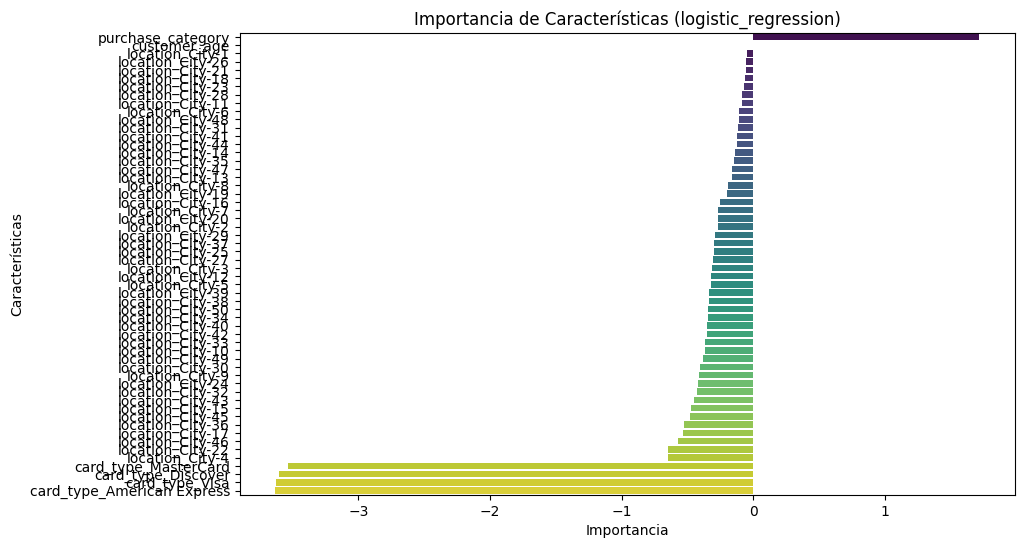

In [5]:
soporte.importancia_predictores("logistic_regression")

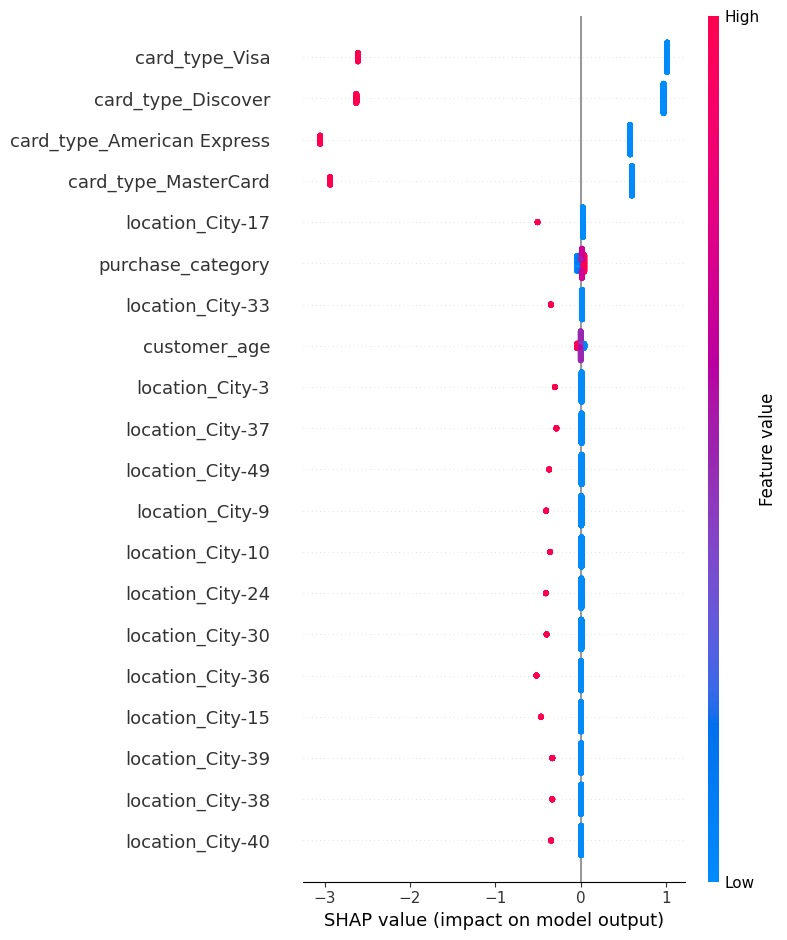

In [6]:
soporte.plot_shap_summary("logistic_regression")

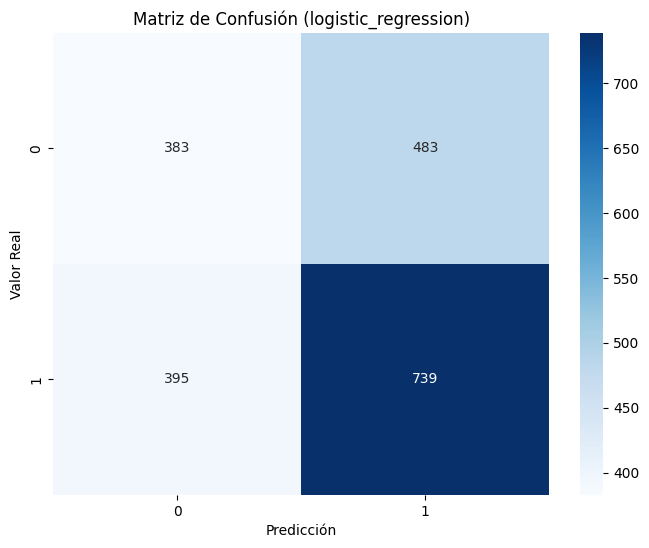

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo3\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


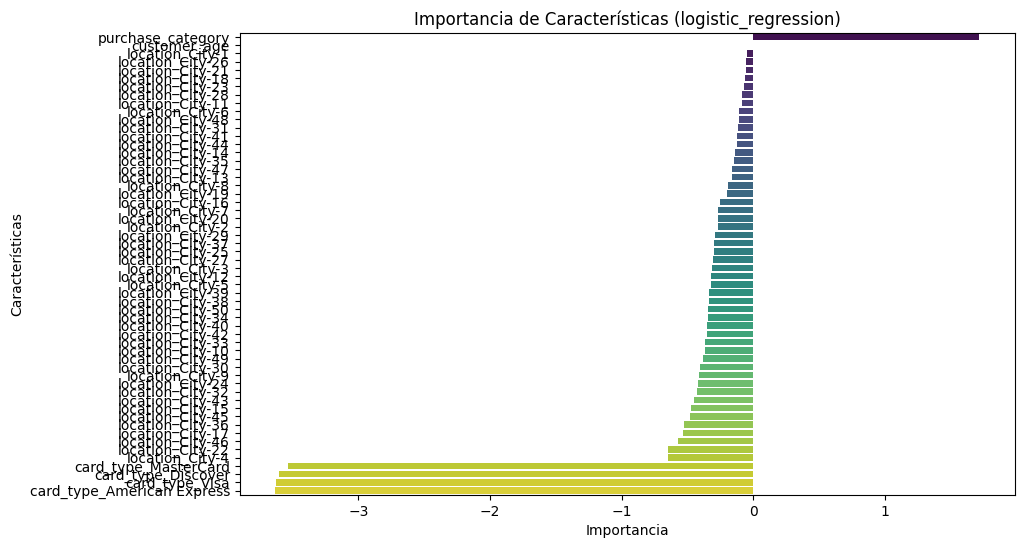

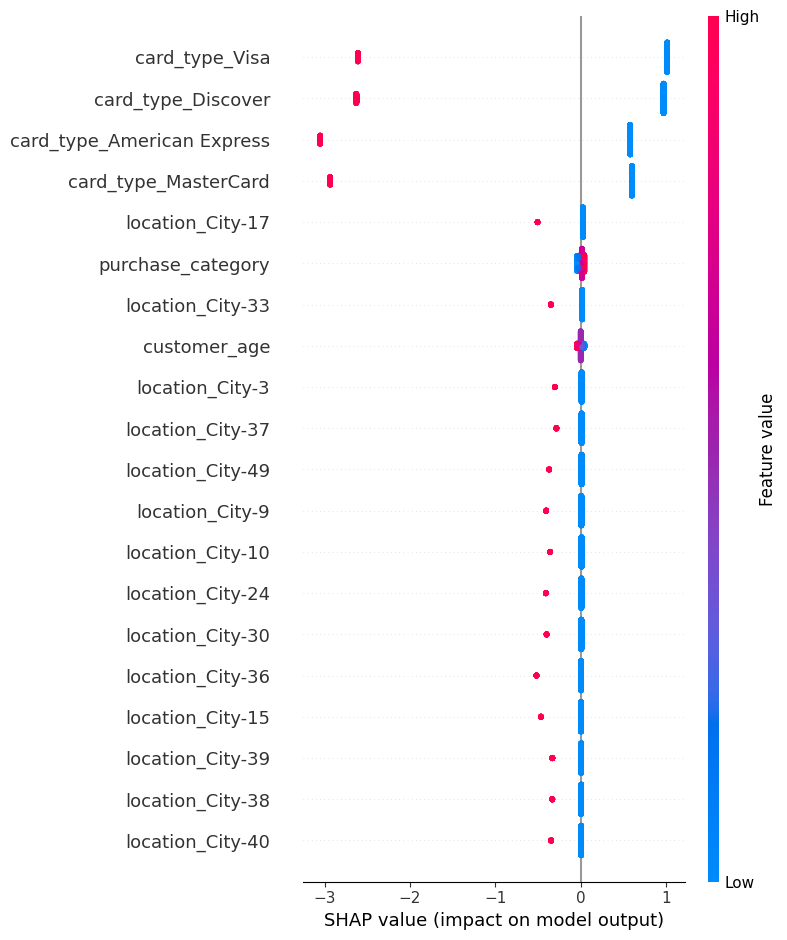

,train,test
accuracy,0.578625,0.561
precision,0.575239,0.556052
recall,0.578625,0.561
f1,0.57587,0.557449
kappa,0.1397,0.09508
auc,0.627693,0.615044
time_seconds,0.003002,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.003002


El mejor modelo es DecisionTreeClassifier(max_depth=7, min_samples_leaf=4)


c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


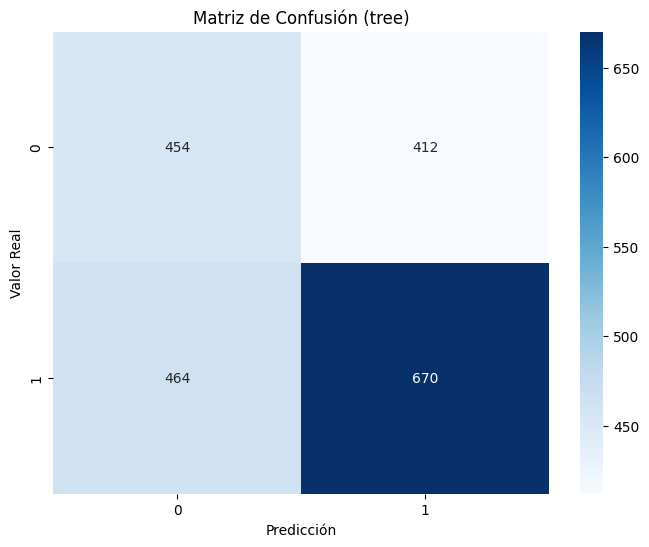

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo3\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


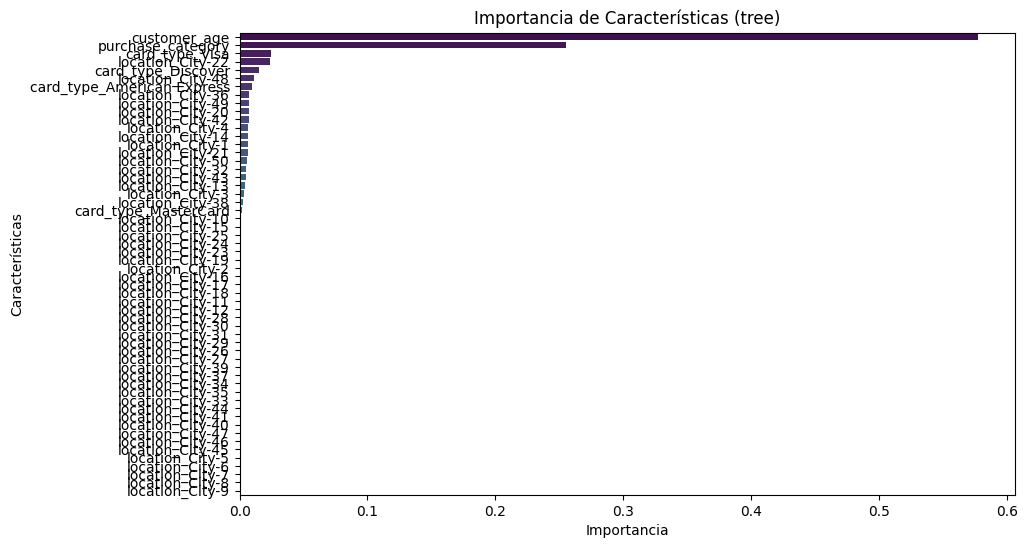

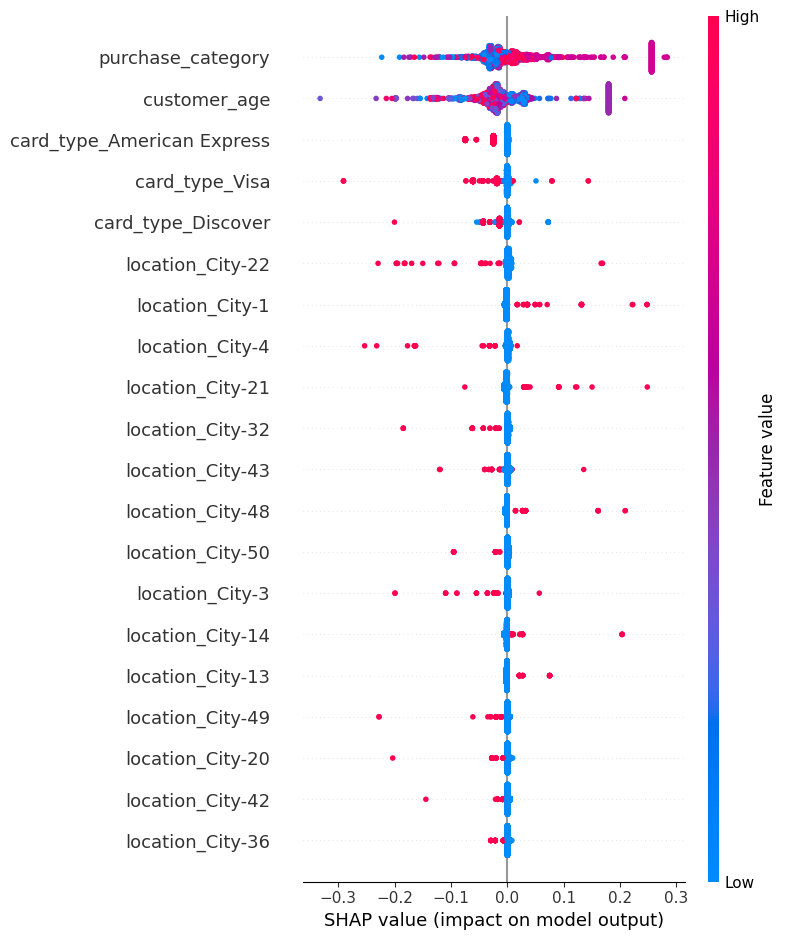

,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562
precision,0.575239,0.556052,0.59823,0.565241
recall,0.578625,0.561,0.594,0.562
f1,0.57587,0.557449,0.595096,0.563244
kappa,0.1397,0.09508,0.185989,0.114268
auc,0.627693,0.615044,0.647702,0.603187
time_seconds,0.003002,NaN,0.002001,NaN
n_jobs,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree
tiempo_computacion(segundos),NaN,0.003002,NaN,0.002001


c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


El mejor modelo es RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50)


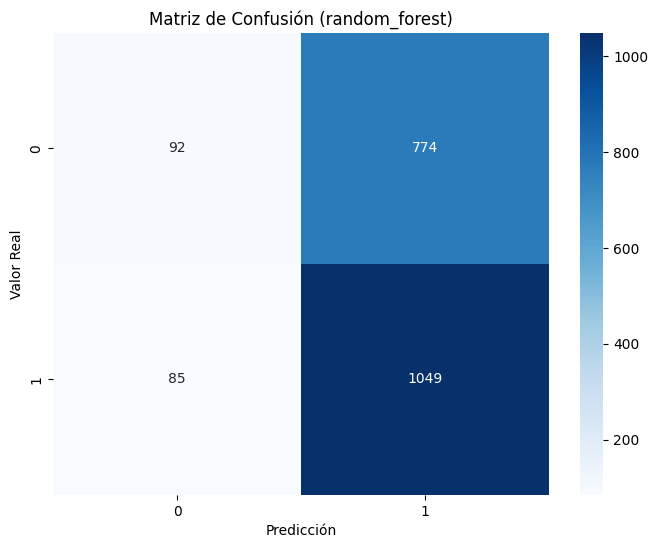

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo3\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


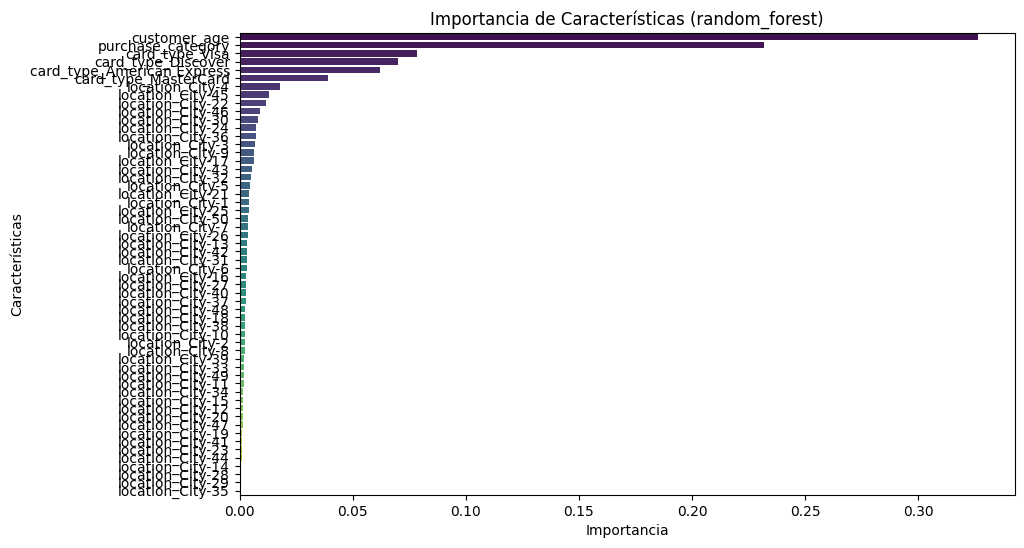

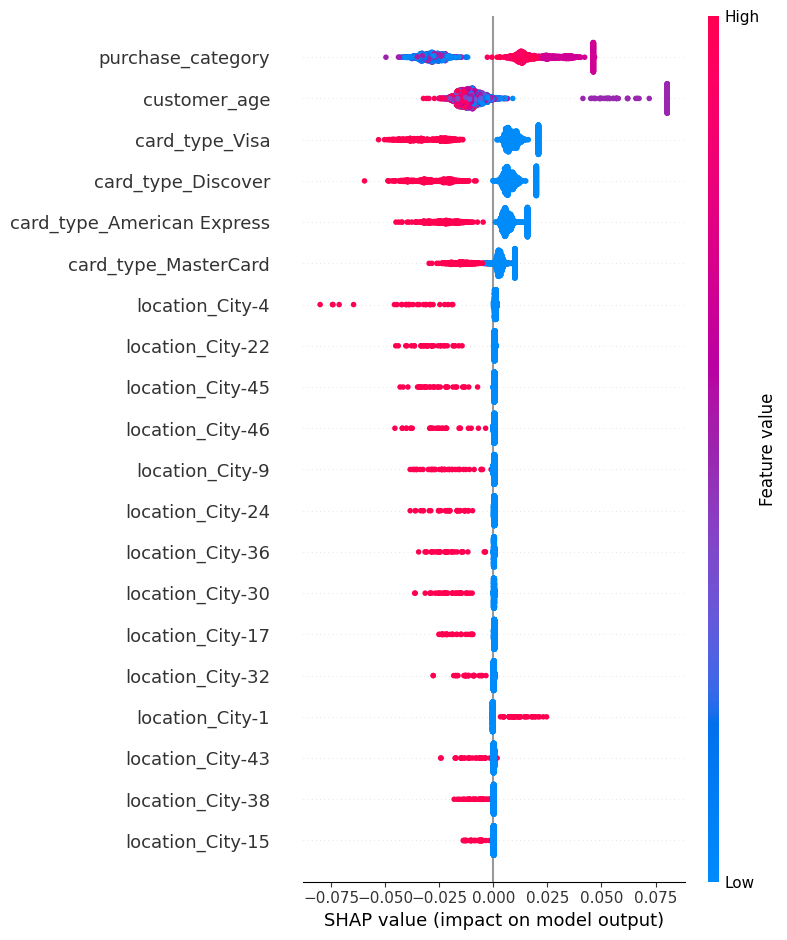

,train,test,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562,0.596875,0.5705
precision,0.575239,0.556052,0.59823,0.565241,0.63842,0.551328
recall,0.578625,0.561,0.594,0.562,0.596875,0.5705
f1,0.57587,0.557449,0.595096,0.563244,0.520201,0.478675
kappa,0.1397,0.09508,0.185989,0.114268,0.12013,0.034526
auc,0.627693,0.615044,0.647702,0.603187,0.667787,0.617609
time_seconds,0.003002,NaN,0.002001,NaN,0.016514,NaN
n_jobs,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest
tiempo_computacion(segundos),NaN,0.003002,NaN,0.002001,NaN,0.016514


El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                           min_samples_split=10, subsample=0.8)


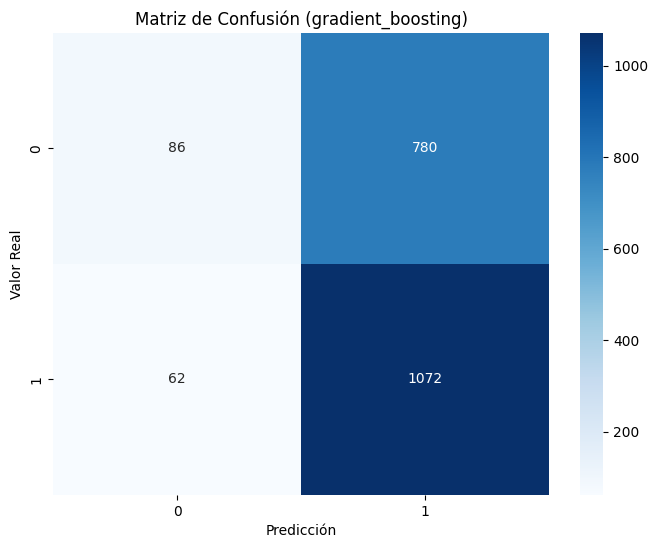

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo3\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


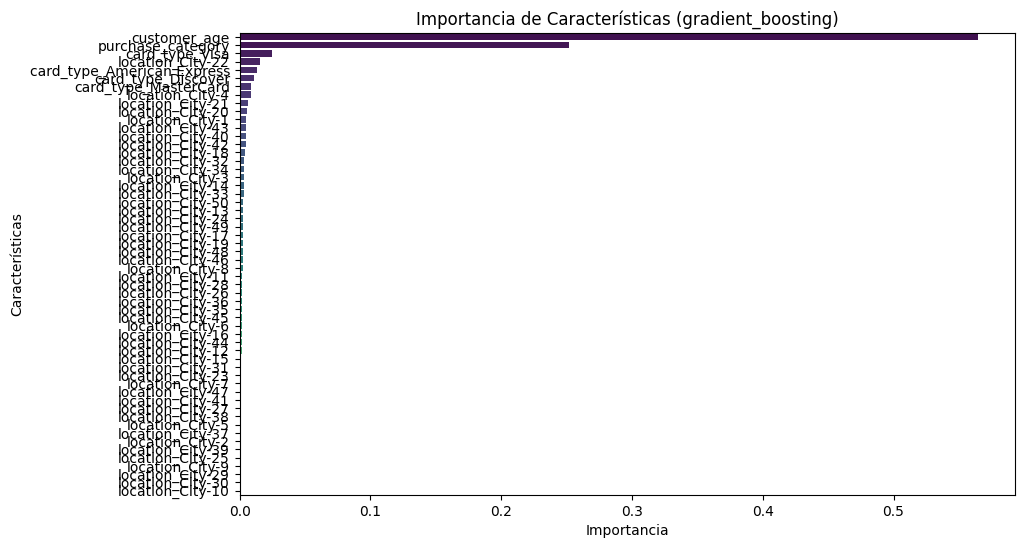

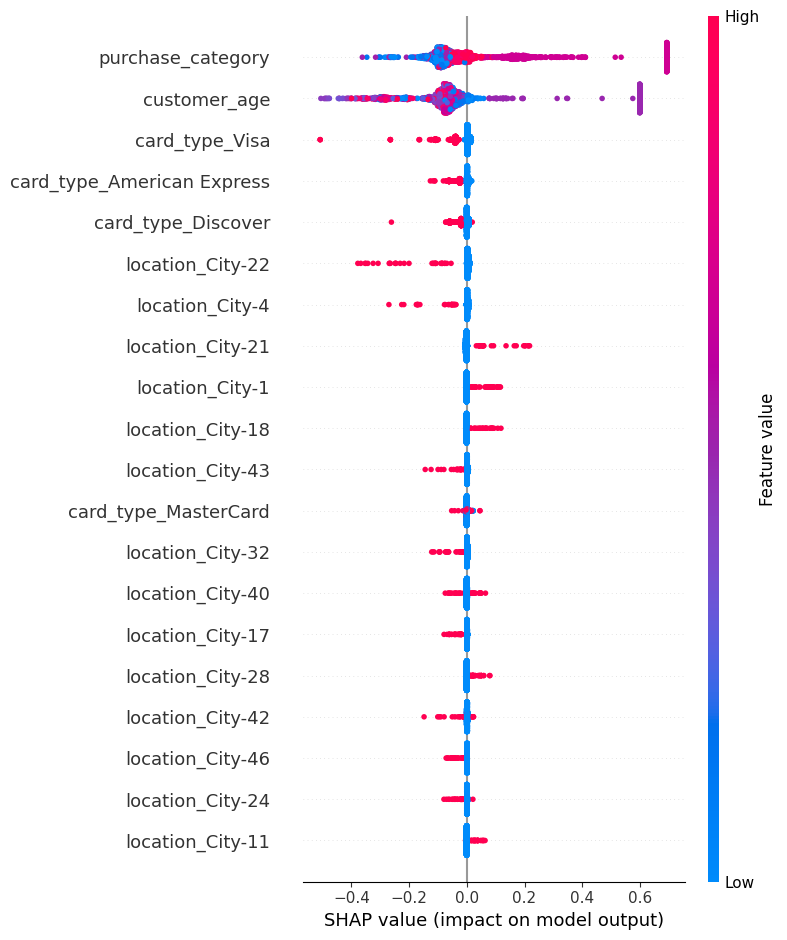

,train,test,train,test,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562,0.596875,0.5705,0.59875,0.579
precision,0.575239,0.556052,0.59823,0.565241,0.63842,0.551328,0.652,0.579807
recall,0.578625,0.561,0.594,0.562,0.596875,0.5705,0.59875,0.579
f1,0.57587,0.557449,0.595096,0.563244,0.520201,0.478675,0.517705,0.480564
kappa,0.1397,0.09508,0.185989,0.114268,0.12013,0.034526,0.122263,0.049481
auc,0.627693,0.615044,0.647702,0.603187,0.667787,0.617609,0.700181,0.626115
time_seconds,0.003002,NaN,0.002001,NaN,0.016514,NaN,0.019004,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.003002,NaN,0.002001,NaN,0.016514,NaN,0.019004


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


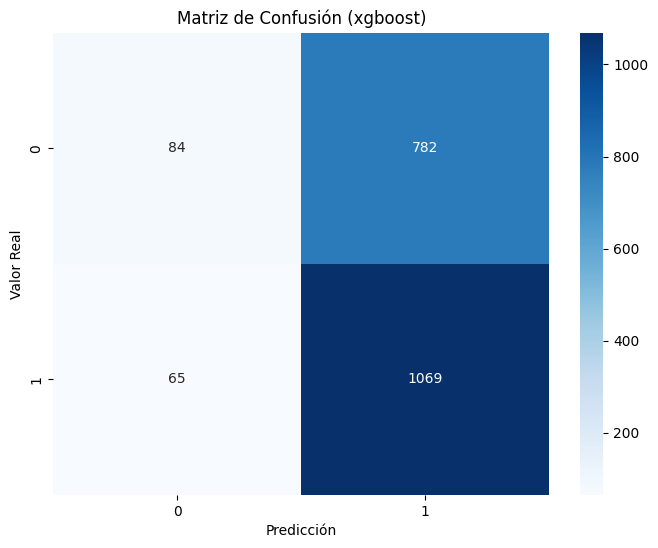

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo3\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


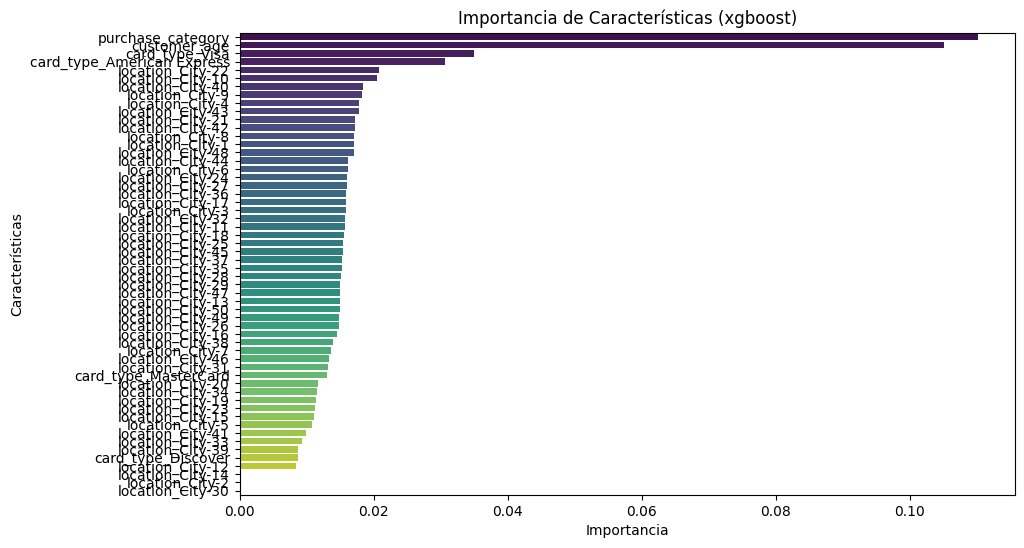

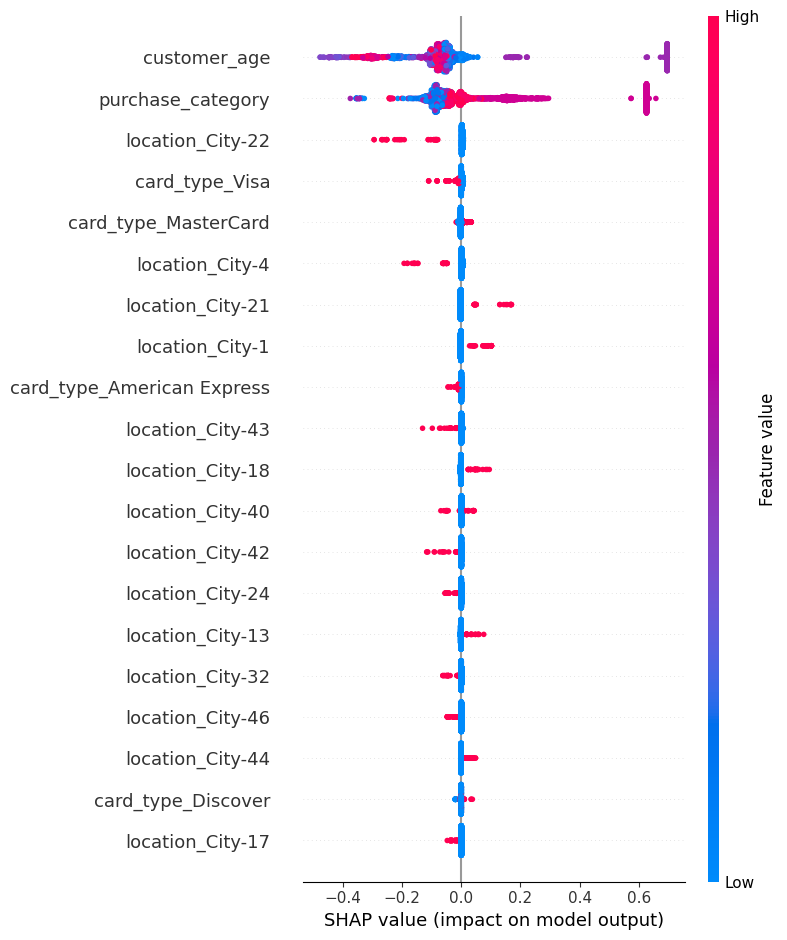

,train,test,train,test,train,test,train,test,train,test
accuracy,0.578625,0.561,0.594,0.562,0.596875,0.5705,0.59875,0.579,0.579125,0.5765
precision,0.575239,0.556052,0.59823,0.565241,0.63842,0.551328,0.652,0.579807,0.607199,0.571564
recall,0.578625,0.561,0.594,0.562,0.596875,0.5705,0.59875,0.579,0.579125,0.5765
f1,0.57587,0.557449,0.595096,0.563244,0.520201,0.478675,0.517705,0.480564,0.488651,0.477782
kappa,0.1397,0.09508,0.185989,0.114268,0.12013,0.034526,0.122263,0.049481,0.077161,0.043981
auc,0.627693,0.615044,0.647702,0.603187,0.667787,0.617609,0.700181,0.626115,0.6681,0.62407
time_seconds,0.003002,NaN,0.002001,NaN,0.016514,NaN,0.019004,NaN,0.016004,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost
tiempo_computacion(segundos),NaN,0.003002,NaN,0.002001,NaN,0.016514,NaN,0.019004,NaN,0.016004


,accuracy,precision,recall,f1,kappa
train,0.578625,0.575239,0.578625,0.57587,0.1397
test,0.561,0.556052,0.561,0.557449,0.09508
train,0.594,0.59823,0.594,0.595096,0.185989
test,0.562,0.565241,0.562,0.563244,0.114268
train,0.596875,0.63842,0.596875,0.520201,0.12013
test,0.5705,0.551328,0.5705,0.478675,0.034526
train,0.59875,0.652,0.59875,0.517705,0.122263
test,0.579,0.579807,0.579,0.480564,0.049481
train,0.579125,0.607199,0.579125,0.488651,0.077161
test,0.5765,0.571564,0.5765,0.477782,0.043981


In [7]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
for modelo in lista_modelos:
    # soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [8]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
0,0.578625,0.575239,0.578625,0.575870,0.139700,0.627693,0.003002,None,logistic_regression,nan,nan
1,0.561000,0.556052,0.561000,0.557449,0.095080,0.615044,nan,nan,logistic_regression,0.003002,None
2,0.594000,0.598230,0.594000,0.595096,0.185989,0.647702,0.002001,16,tree,nan,nan
3,0.562000,0.565241,0.562000,0.563244,0.114268,0.603187,nan,nan,tree,0.002001,16
4,0.596875,0.638420,0.596875,0.520201,0.120130,0.667787,0.016514,None,random_forest,nan,nan
5,0.570500,0.551328,0.570500,0.478675,0.034526,0.617609,nan,nan,random_forest,0.016514,None
6,0.598750,0.652000,0.598750,0.517705,0.122263,0.700181,0.019004,16,gradient_boosting,nan,nan
7,0.579000,0.579807,0.579000,0.480564,0.049481,0.626115,nan,nan,gradient_boosting,0.019004,16
8,0.579125,0.607199,0.579125,0.488651,0.077161,0.668100,0.016004,None,xgboost,nan,nan
9,0.576500,0.571564,0.576500,0.477782,0.043981,0.624070,nan,nan,xgboost,0.016004,None


In [9]:
df_gradient = df_metricas.T[df_metricas.T["modelo"] == "gradient_boosting"].T
df_gradient

,train,test
accuracy,0.59875,0.579
precision,0.652,0.579807
recall,0.59875,0.579
f1,0.517705,0.480564
kappa,0.122263,0.049481
auc,0.700181,0.626115
time_seconds,0.019004,NaN
n_jobs,16,NaN
modelo,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.019004
